In [2]:
from utils import *

# Archived

In [ ]:

#plt.imshow(img, cmap=plt.get_cmap('hot'))
#plt.figure()
#lmax_loc(None, None, img, adapt=55, local=5, sm=3, plot=plot, mode=0)[1]
thre = [50,280]
p_size = 16
for local in range(1,8):
    plt.subplots(1,5,figsize=(10,2))
    #plt.suptitle("local: "+str(local))
    for sm in range(1,6):
        ax = plt.subplot(1,5,sm)
        ax.grid(False)
        vxs = lmax_loc(None, None, img, local=local, sm=sm, plot=1)[1]
        # links = generateLinks(vxs*p_size, thre=thre, plot=0)
        # visualize(vxs, links, thre=thre, bins=10, p_size=p_size)
        # plt.ylim([0,64])
        # plt.xlim([0,64])
        # plt.axis('off')
        plt.title("counts: "+str(len(vxs)))

In [7]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


#image = data.hubble_deep_field()[0:500, 0:500]
image_gray = img#rgb2gray(image)
image = img

ms=1
ns=10
blobs_log = blob_log(image_gray, min_sigma=0.5, max_sigma=ms, num_sigma=ns, threshold=0.5)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=ms, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=2, threshold=0.05)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for s_blob in blobs:
        y, x, r = s_blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [90]:
def blob(img, **blob_args):
    blobs_log = blob_log(img, **blob_args)
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
    vxs = blobs_log[:,::-1][:,1:3]
    return vxs, blobs_log[:,2]

def plotAngleKDE(vxs, thre, bandwidth=10, p_size=16):
    links = generateLinks(np.array(vxs)*p_size, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure(figsize=[12,4])
    ax = plt.subplot(131)
    ax.axis("off")
    visualize(vxs, links, p_size=p_size, thre=thre)
    ax = plt.subplot(132,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)
    a = np.array(angles).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(a)
    s = np.linspace(-180,180,361)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    ax=plt.subplot(133)
    ax.plot(s, e)
    return s, e, a



# Actively using

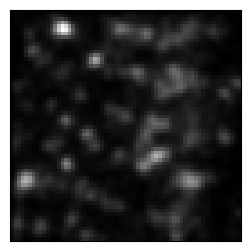

In [3]:
# def lmax_loc(
#     loc_file, regions, rimg, adapt=55, local=7, plot=0, verbose=0, sm=4, mode="full"
# ):
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
for i in [5]:#,5]:
    plt.figure(figsize=(3,3))
    mat = np.load(test_1d[i])
    img = renderImg(mat, k_size=5, sigma=1)
    plt.imshow(img,cmap="gray")
    plt.xticks([],[])
    plt.yticks([], [])

NameError: name 'img' is not defined

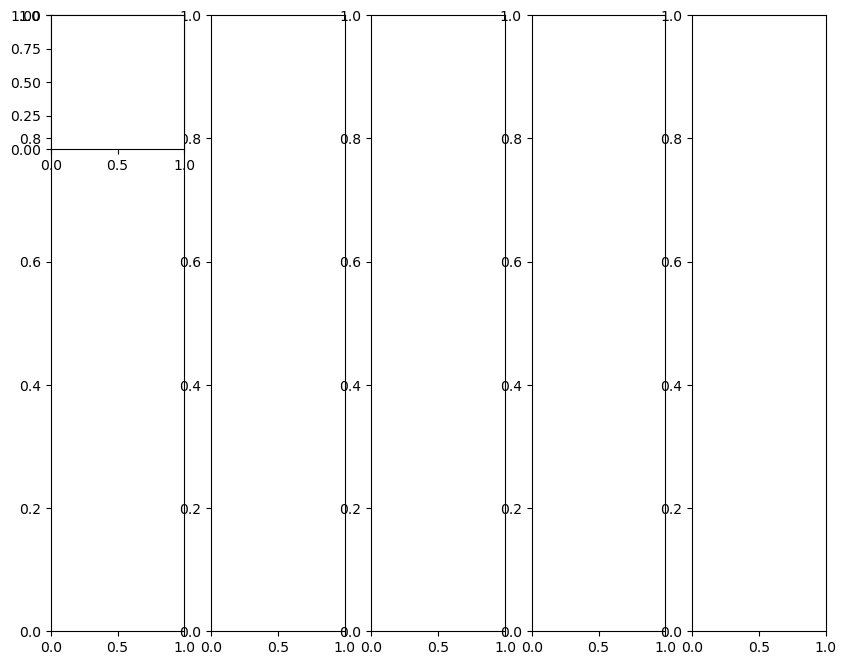

In [3]:
thre=[50,280]
ms=1
ns=20
n=4
plt.subplots(1,5,figsize=(10,2*n))
for i in range(5):
    threshold = 0.05*i+0.1
    ax = plt.subplot(n,5,i+1)
    ax.imshow(img)
    vxs,r = blob(img, min_sigma=0.5, max_sigma=ms, num_sigma=ns, threshold_rel=threshold)
    for j in range(len(vxs)):
        c = plt.Circle((vxs[j,0], vxs[j,1]), r[j], color="red", linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()
    plt.subplot(n,5,i+6)
    links = generateLinks(vxs*p_size, thre=thre, plot=0)
    visualize(vxs, links, thre=thre, bins=10, p_size=p_size)
    plt.ylim([0,64])
    plt.xlim([0,64])
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title("counts: "+str(len(vxs)))
    ax = plt.subplot(n,5,i+11,projection="polar")
    angles = getTop3Angle(vxs, links)
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)
    ax=plt.subplot(n,5,i+16)
    a = np.array(angles).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=15).fit(a)
    s = np.linspace(-180,180,361)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    ax.plot(s, e)

    

In [7]:
from sklearn.decomposition import PCA

In [9]:

def readVXSfromMat(mat, grid_size=64, plot=0, **cluster_args):
    img = renderImg(mat, k_size=5, sigma=1)
    vxs, r = blob(img, **cluster_args)
    return vxs,0, np.std(r)
    # TODO: add later illumination and size


def statsForMat(mat, pixel_size=16, thre=[0,220],**cluster_args):
    vxs, std_ill, std_size = readVXSfromMat(mat,**cluster_args)
    stats = [std_ill, std_size]
    stats.extend(statsForVXS(vxs*pixel_size, thre=thre))
    return stats

def statsForNpys(npys, rrange=[5, 8], thre=[0, 220], pixel_size=16, title="",**cluster_args):
    n_mat = len(npys)
    fft_mat = np.zeros([n_mat, 2])
    stats_mat = []
    for i in range(n_mat):
        mat = np.load(npys[i])
        stats_mat.append(statsForMat(mat, thre=thre,**cluster_args))
        # nimg = renderImg(mat, k_size=5, sigma=1)
        # fft_mat[i][0] = fft_filter(nimg, rrange, method="fft", corr="Spearman")[0]
        # fft_mat[i][1] = fft_filter(nimg, rrange, method="bin", corr="Spearman")[0]
    # all_mat = np.concatenate((fft_mat, np.array(stats_mat)), axis=1)
    all_mat = np.array(stats_mat)
    sns.set_theme(rc={"figure.figsize": (10, 10)})
    labels = [
        # "1D score(FFT)",
        # "1D score(BIN)",
        r"$\sigma$ of Blink events",
        r"$\sigma$ of Molecule Cluster Size",
        "Density",
        "#Average Connections",
        r"$\sigma$ of links",
        "%Area",
        "Elastic Energy",
        "Average Deviation of Angles from 60 degree",
        "Average Deviation of Angles from 30 degree",
        r"$\sigma$ of angles",
    ]
    _ = showCorr(all_mat, labels, method="spearman")
    #_ = showCorr(all_mat,  method="spearman")
    #plt.title(title + " n=" + str(n_mat))
    return all_mat


In [152]:
def generateLinks(vxs, img=None, thre=[100, 200], plot=1):
    # first step
    n_vx = len(vxs)
    links = np.zeros([n_vx, n_vx])
    if n_vx <= 4:
        return links
    tri = Delaunay(vxs)
    small_tri = [
        x
        for x in tri.simplices
        if thre[0] <= np.linalg.norm(vxs[x[0]] - vxs[x[1]]) <= thre[1]
        and thre[0] <= np.linalg.norm(vxs[x[2]] - vxs[x[1]]) <= thre[1]
        and thre[0] <= np.linalg.norm(vxs[x[0]] - vxs[x[2]]) <= thre[1]
    ]
    for x in small_tri:
        links[x[0]][x[1]] = links[x[1]][x[0]] = links[x[0]][x[2]] = links[x[2]][
            x[0]
        ] = links[x[1]][x[2]] = links[x[2]][x[1]] = 1
    if plot:
        plt.figure(figsize=[10, 10])
        if img:
            plt.imshow(img)
        if small_tri:
            plt.triplot(vxs[:, 0], vxs[:, 1], small_tri, c="g")
        plt.plot(
            vxs[:, 0],
            vxs[:, 1],
            ".",
            markerfacecolor="purple",
            markersize=10,
        )
        ax = plt.gca()
        ax.set_aspect("equal", adjustable="box")
    return links

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\Yuan\MPS_project\code\utils.py:1845: RuntimeWarning: invalid value encountered in scalar divide
  p_area = AreaCoveredByTriangles(tri_list, vxs) / (y1 - y0) / (x1 - x0)
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWa

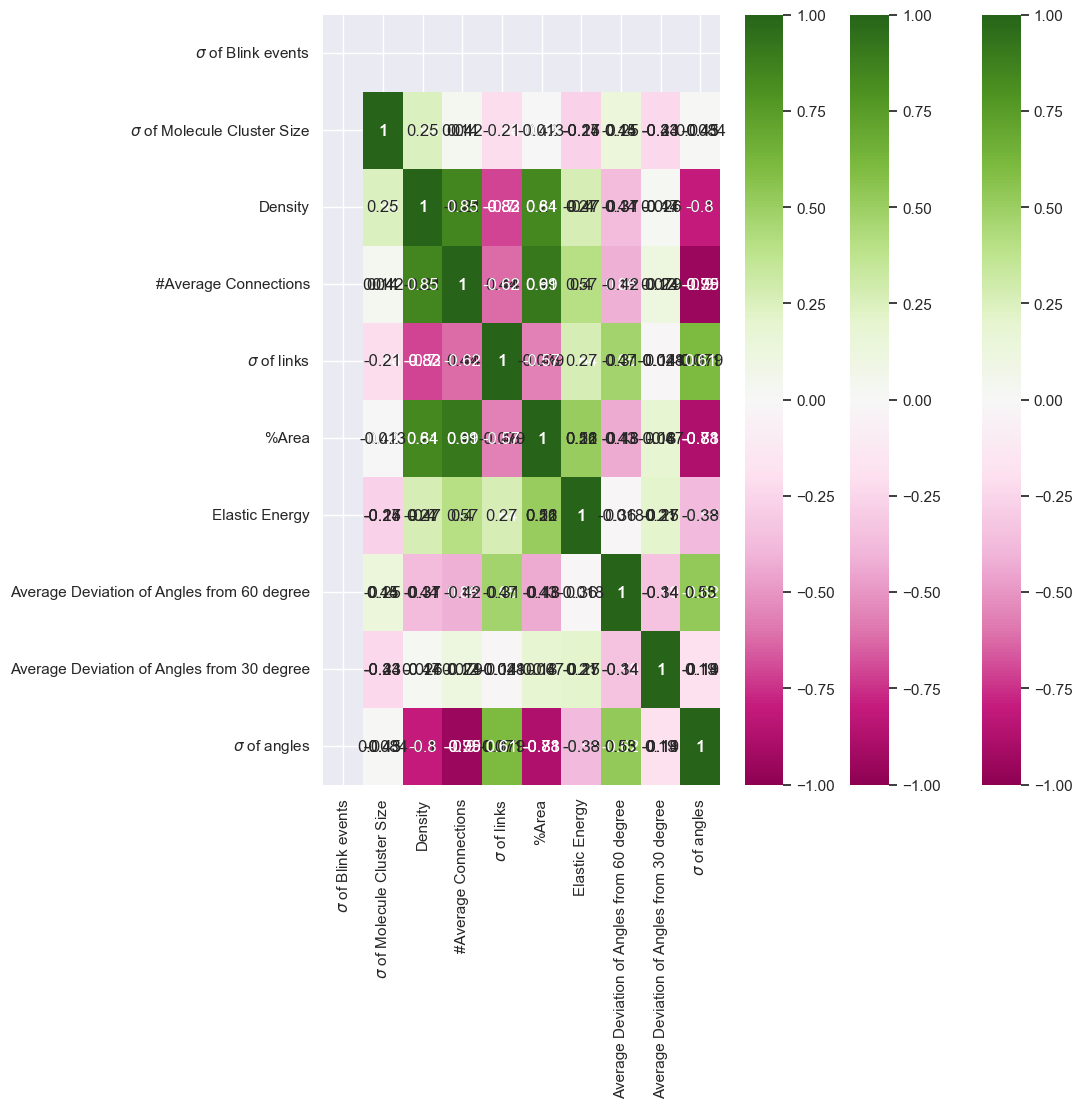

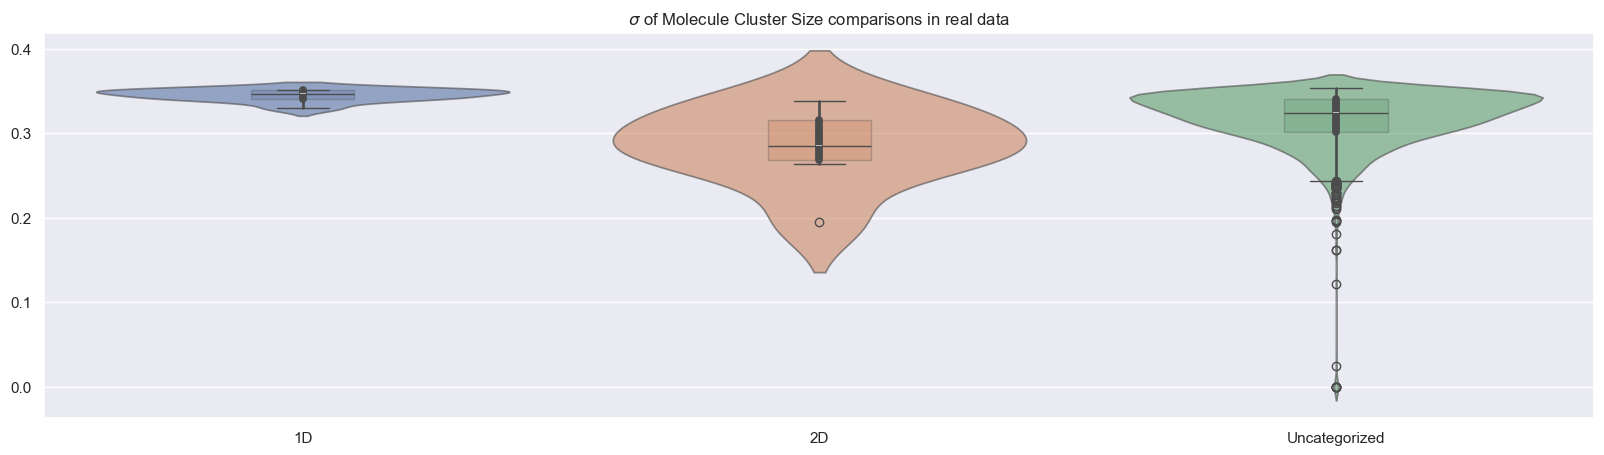

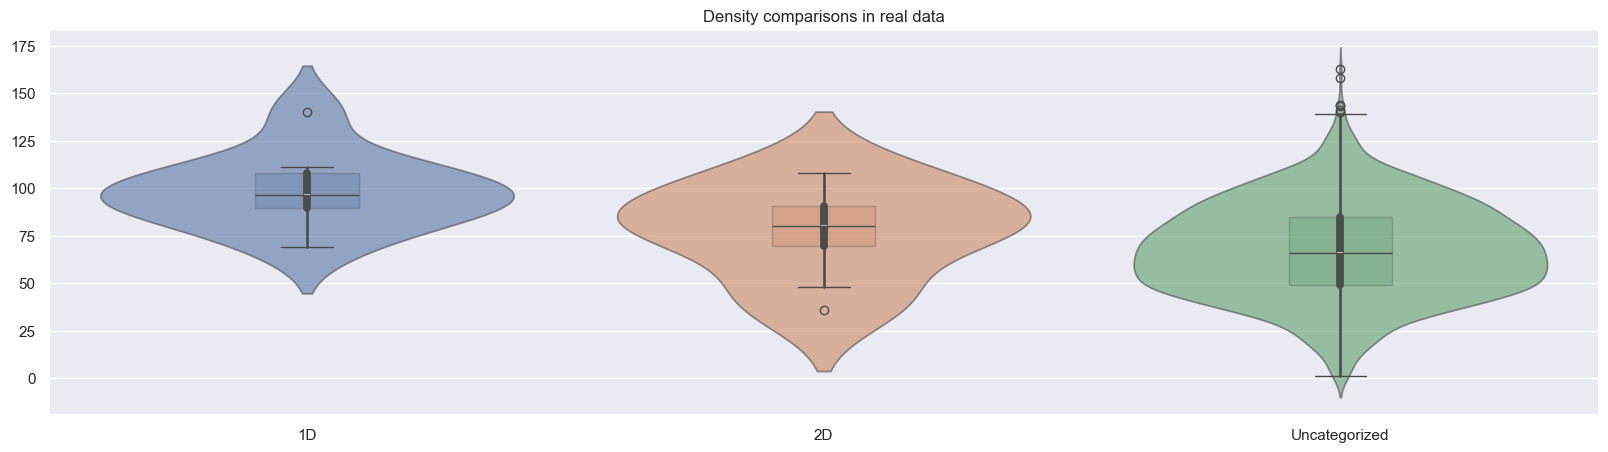

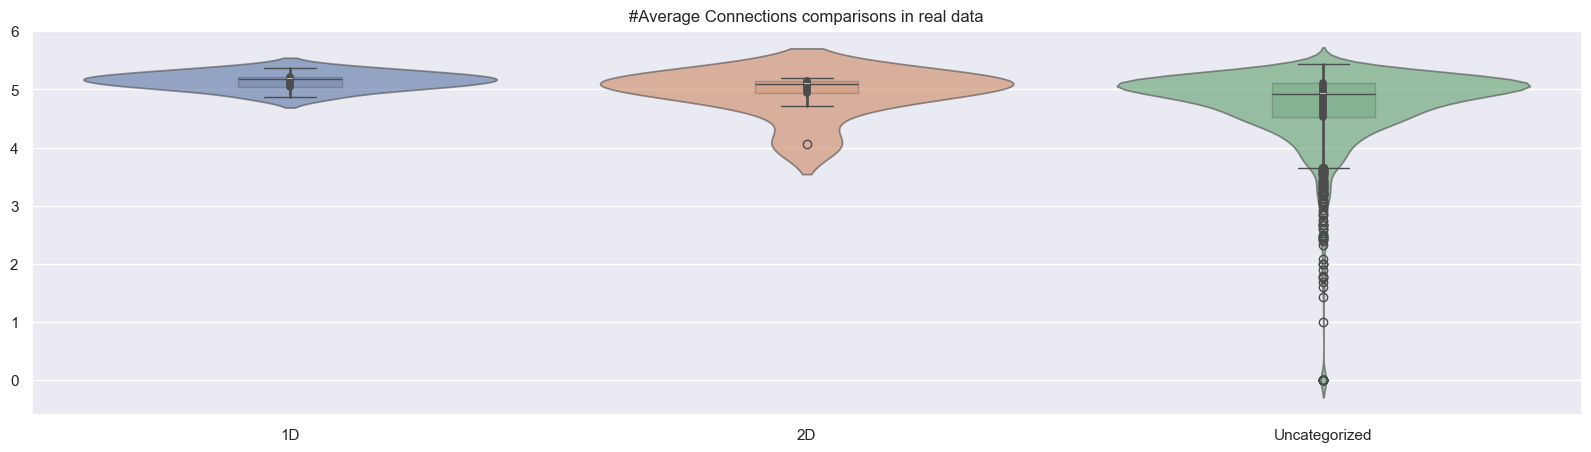

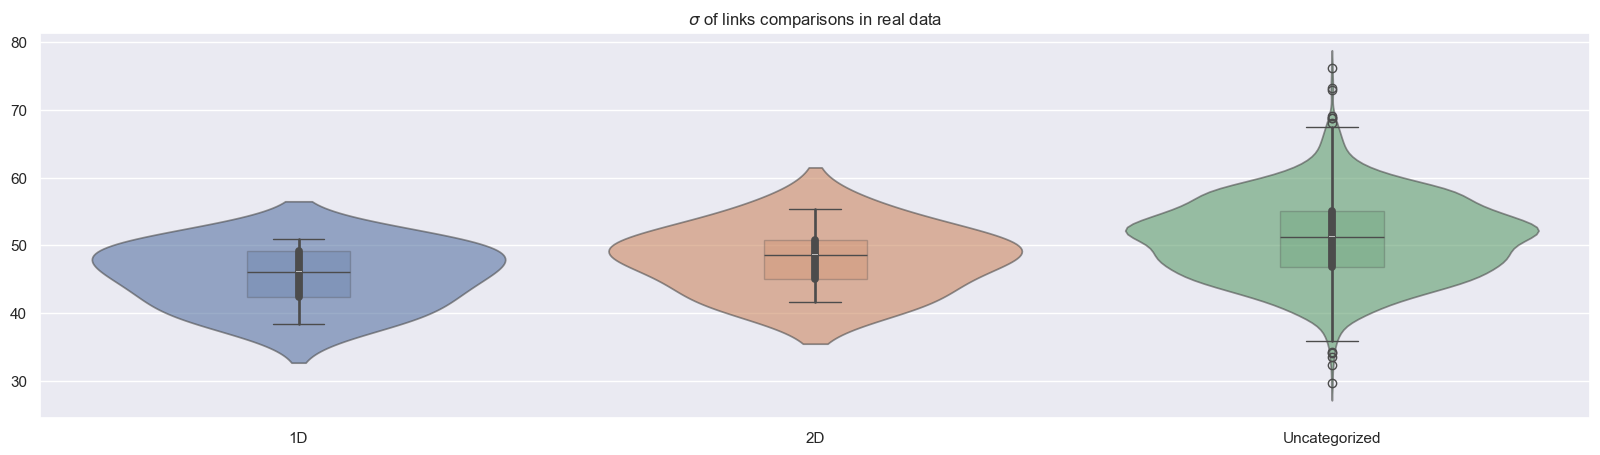

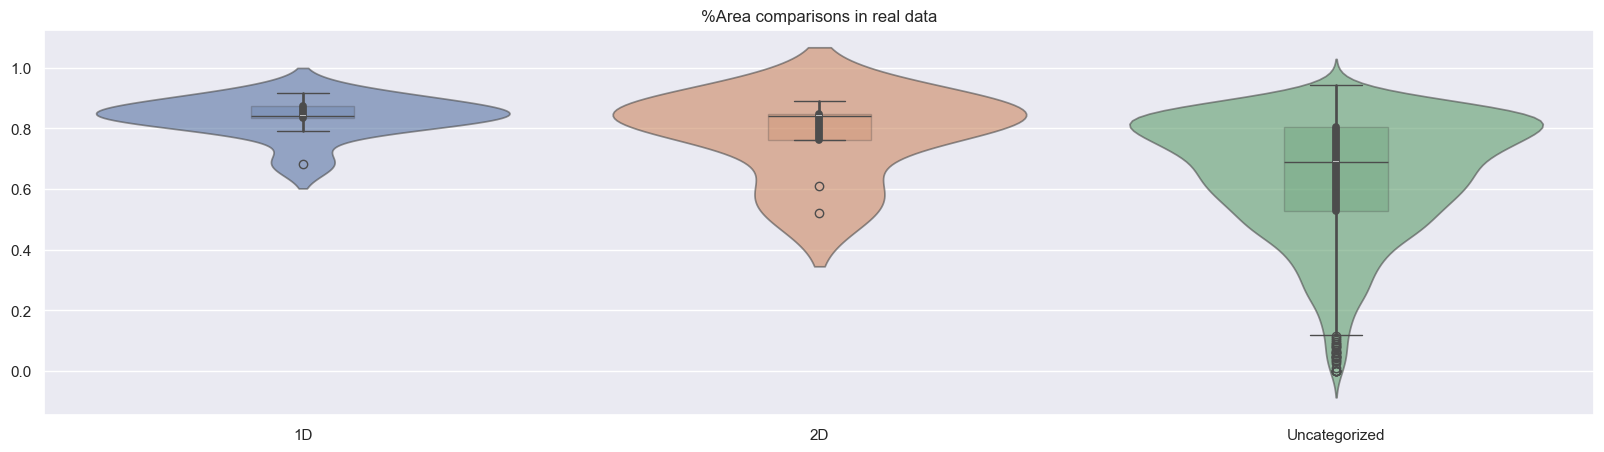

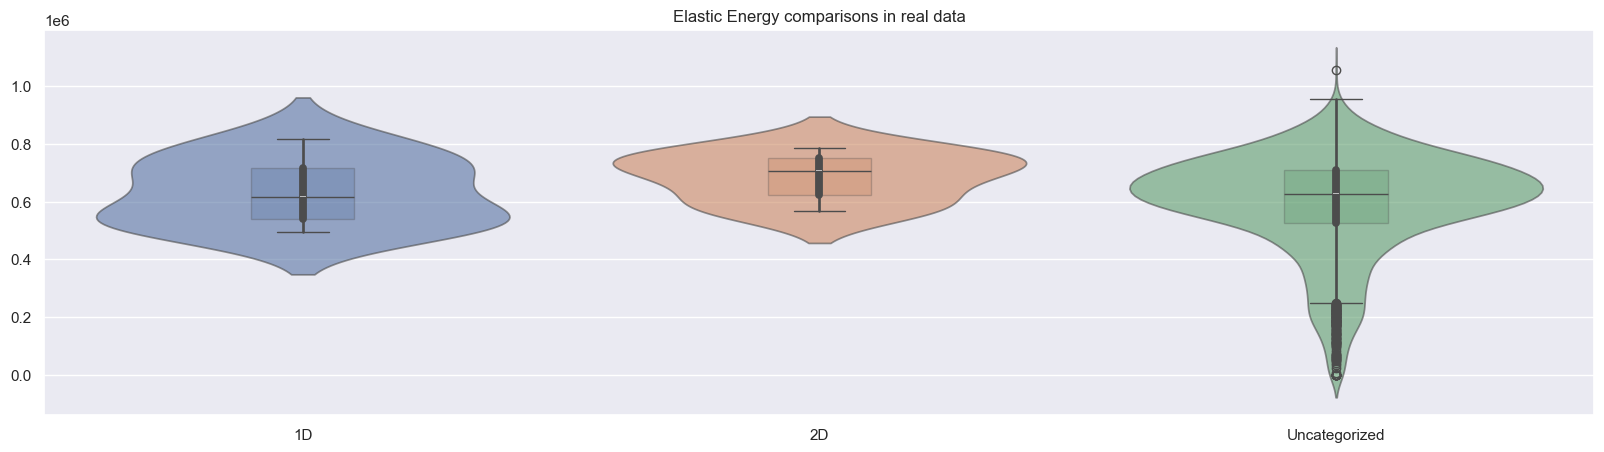

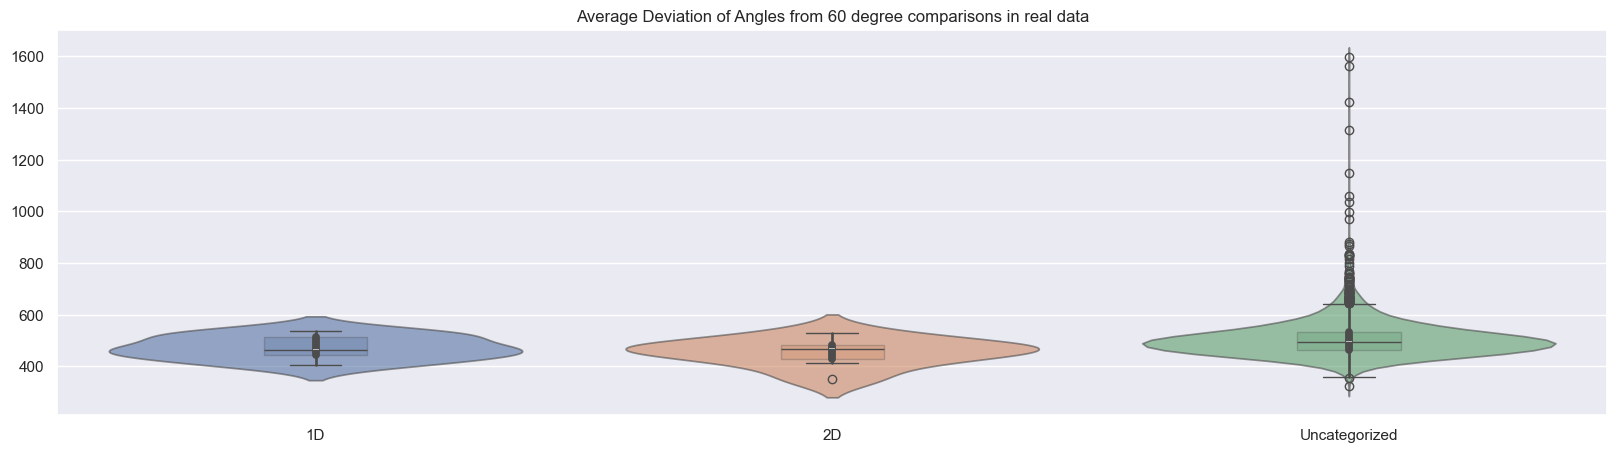

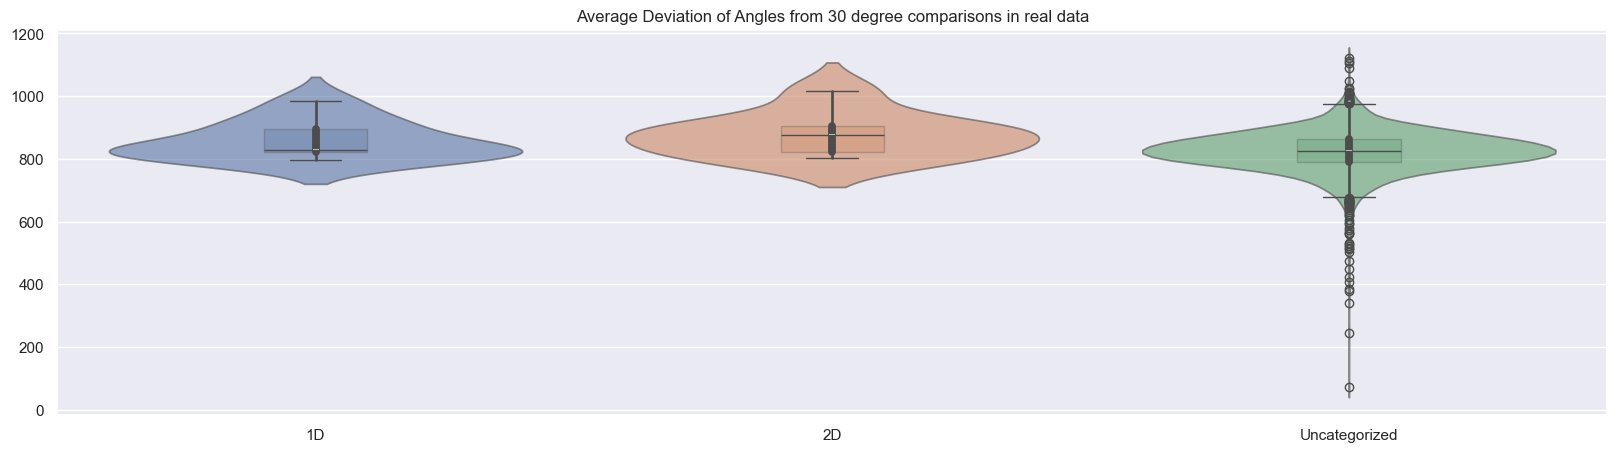

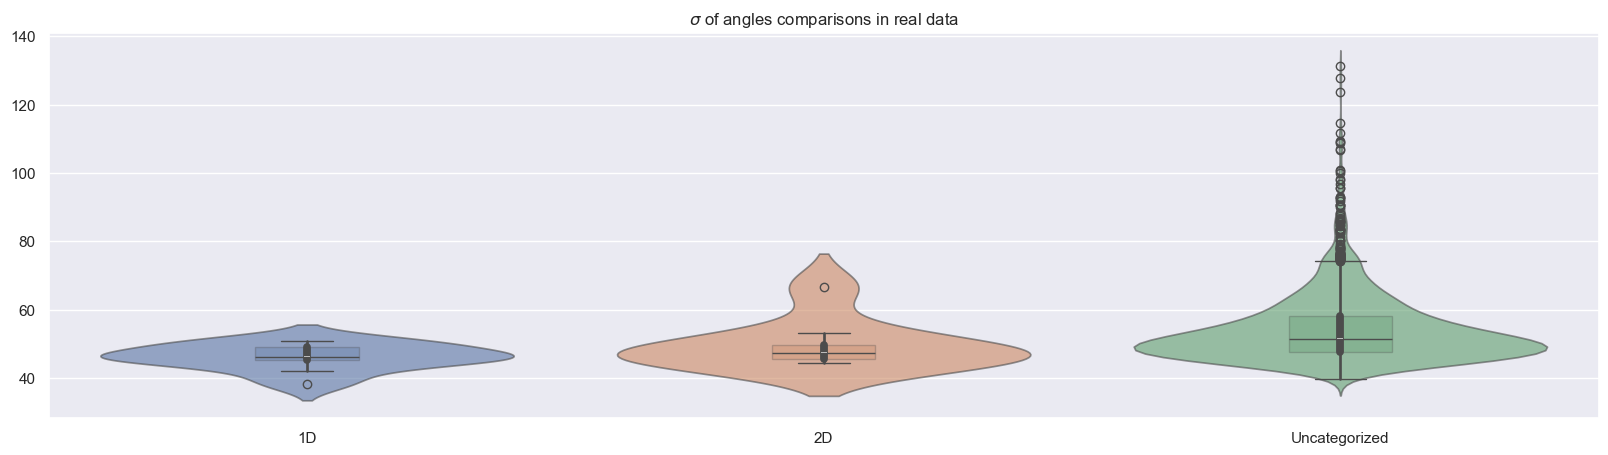

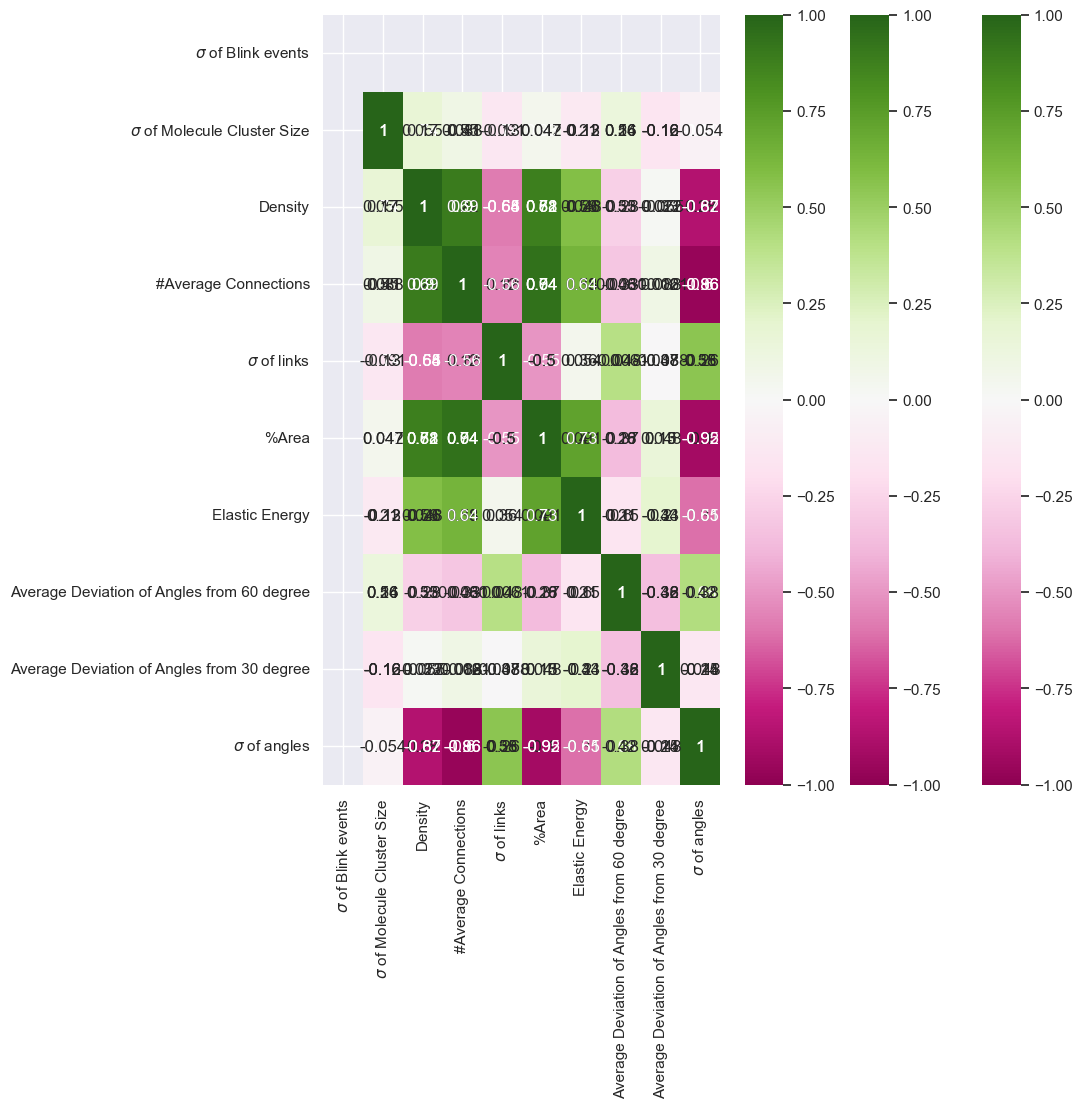

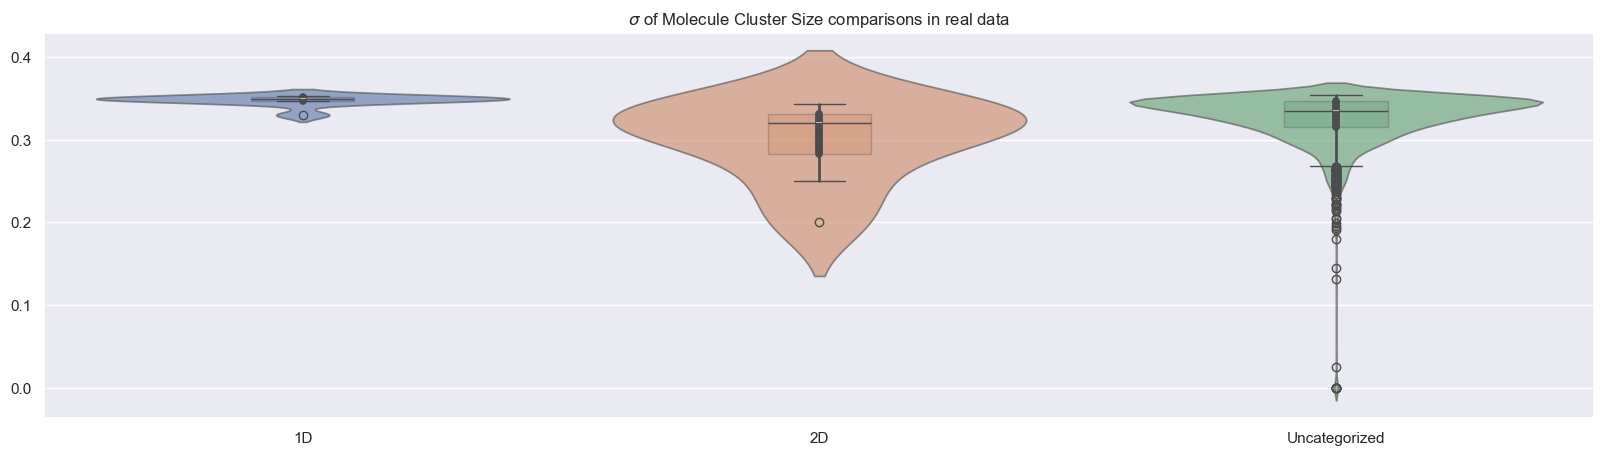

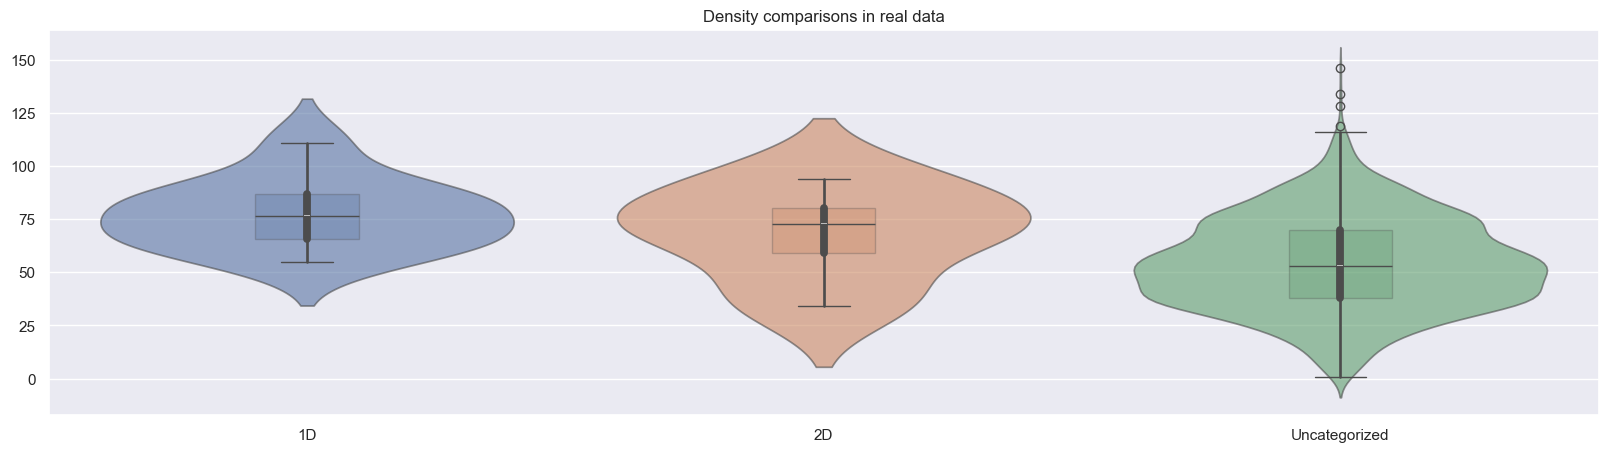

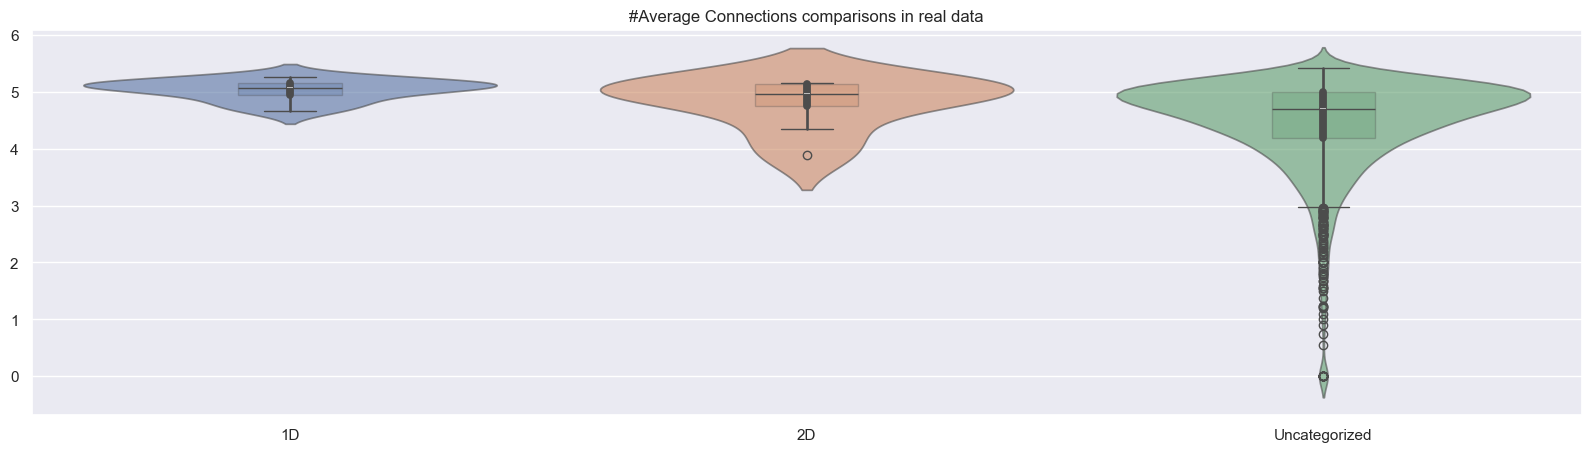

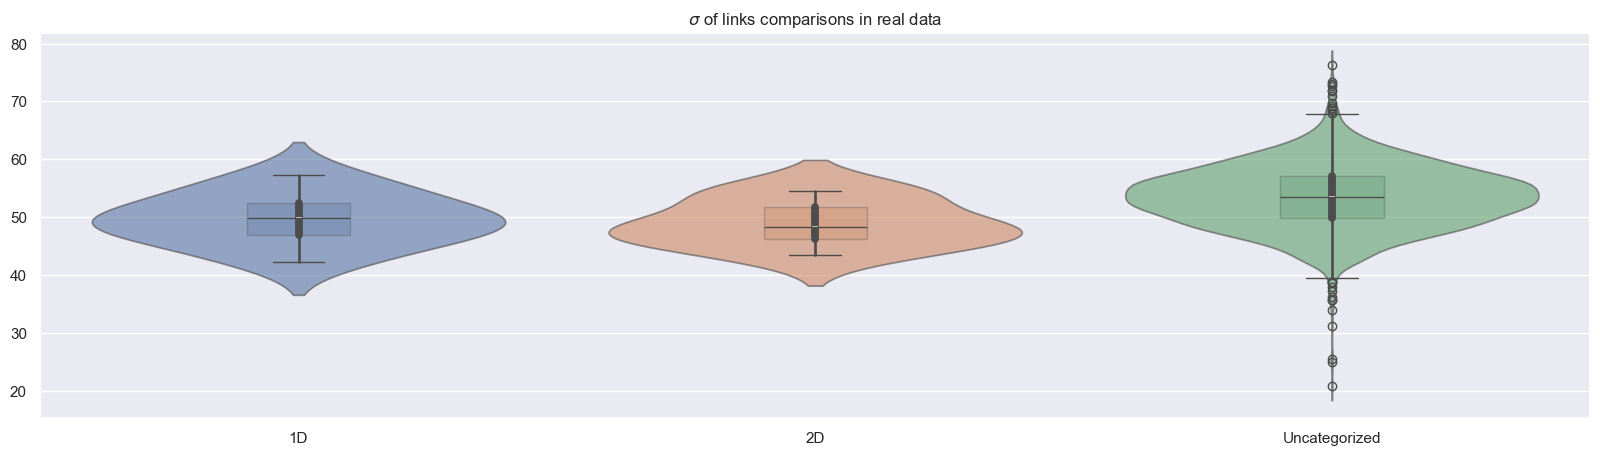

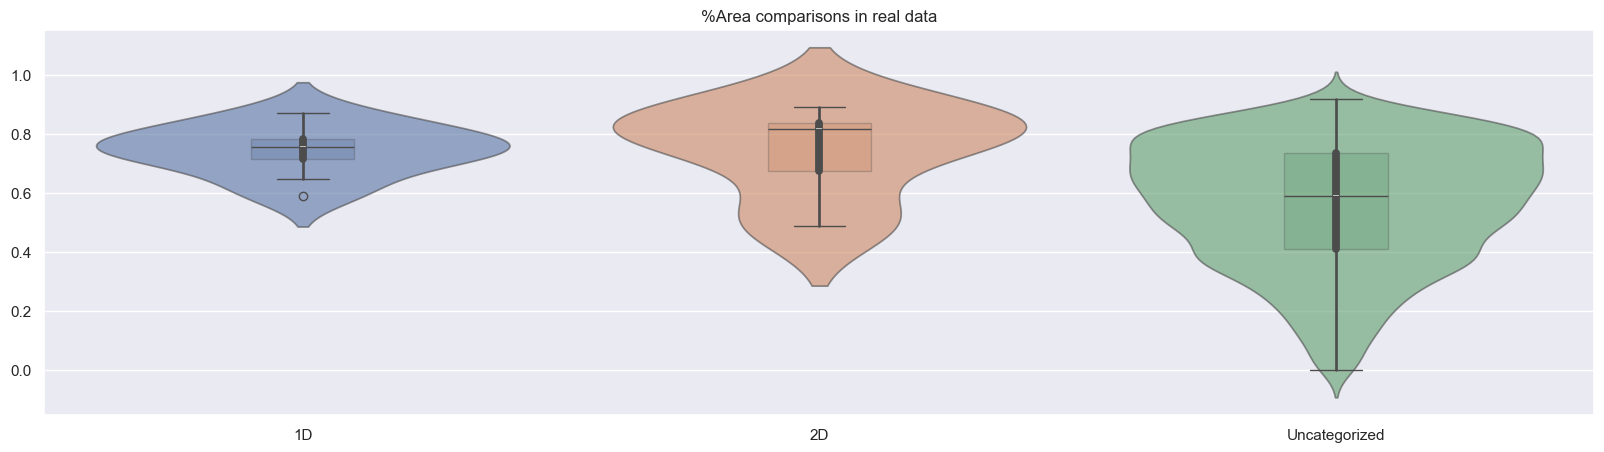

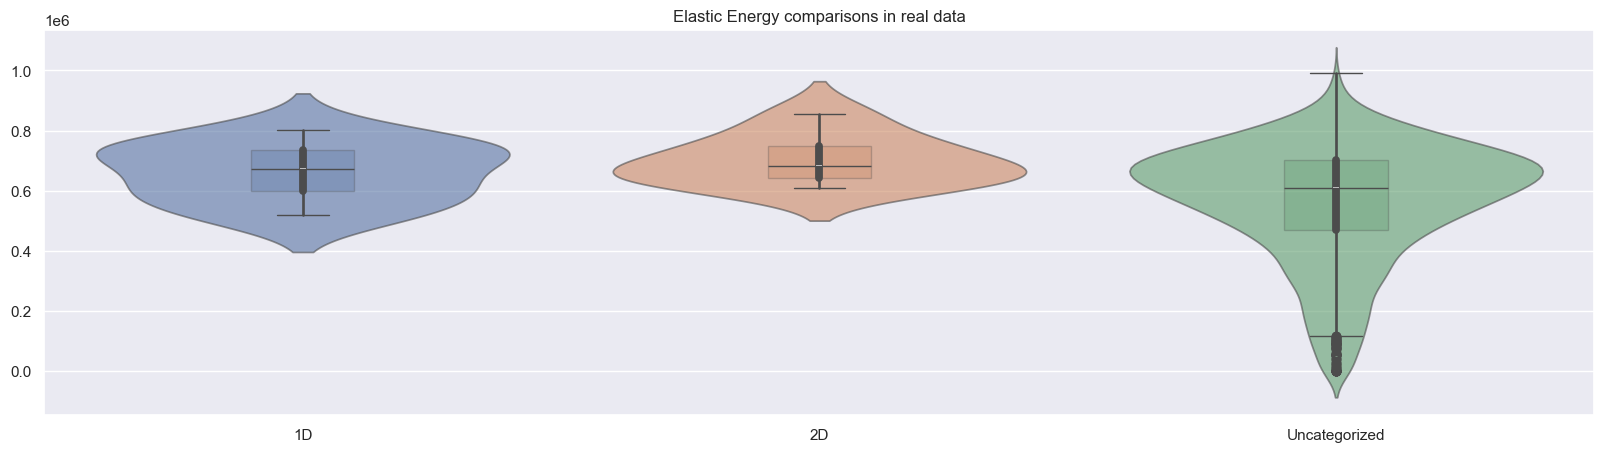

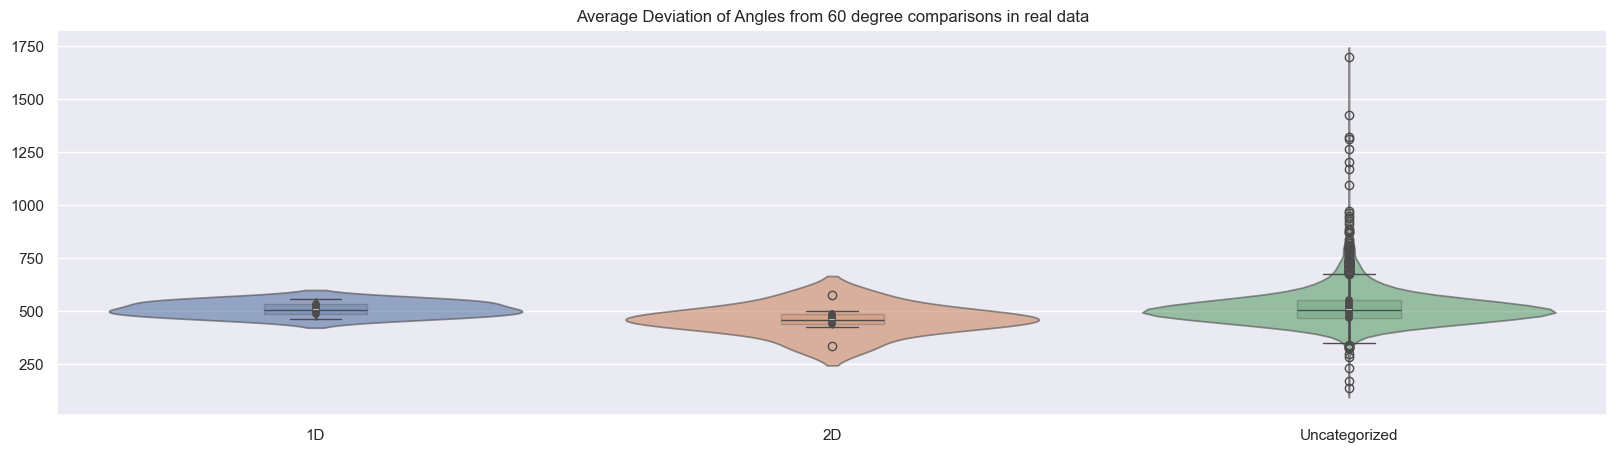

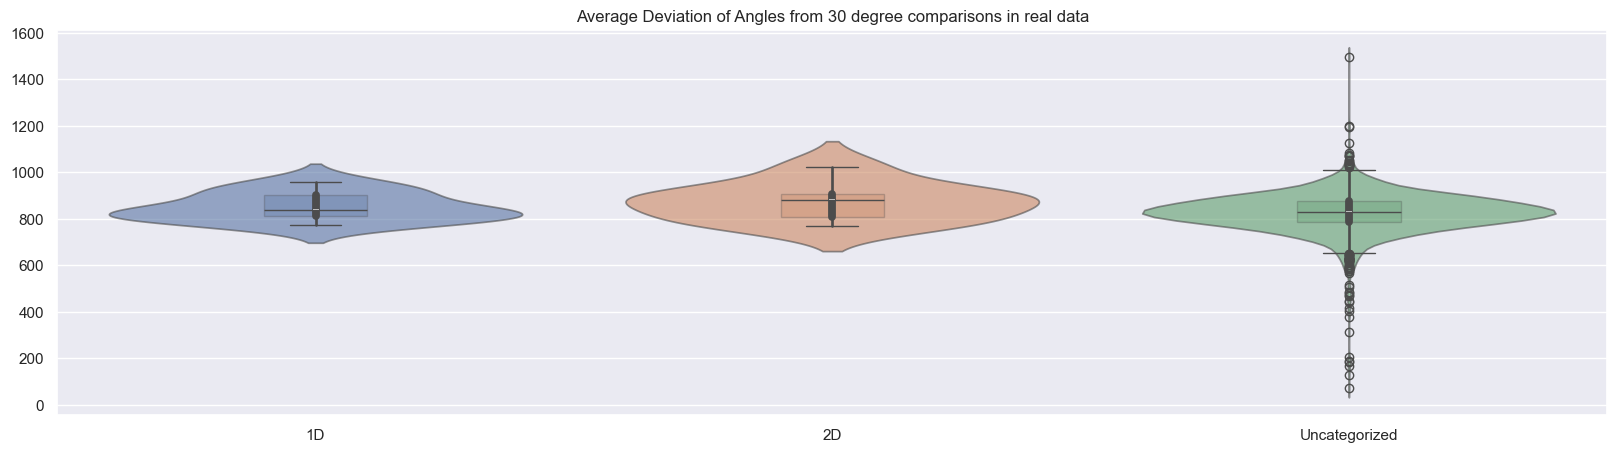

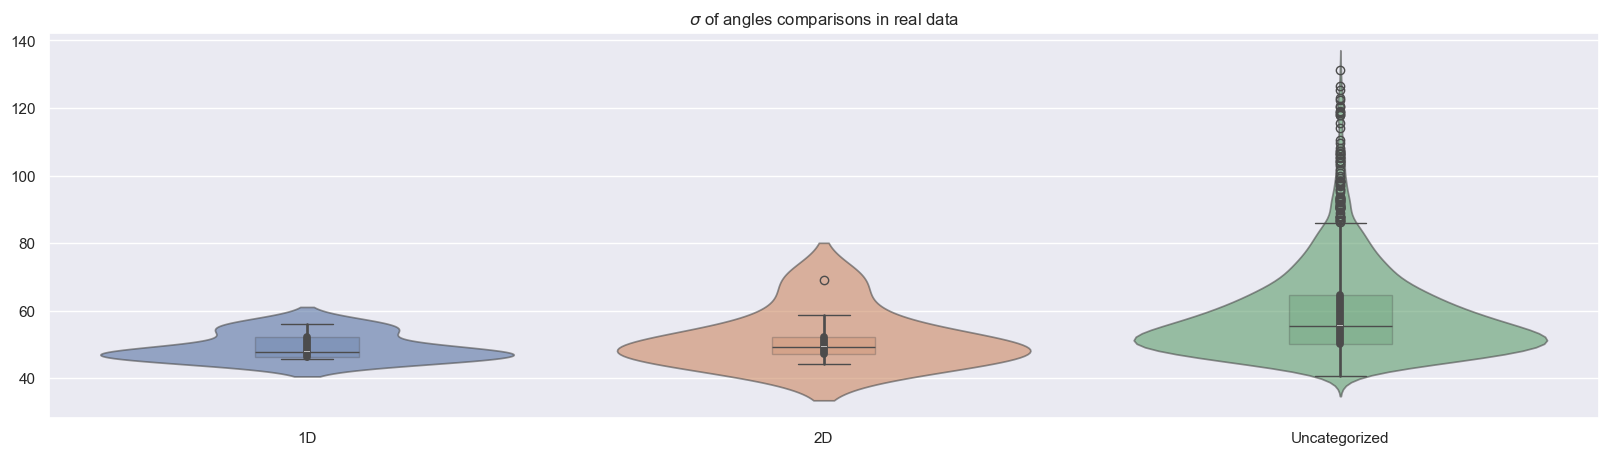

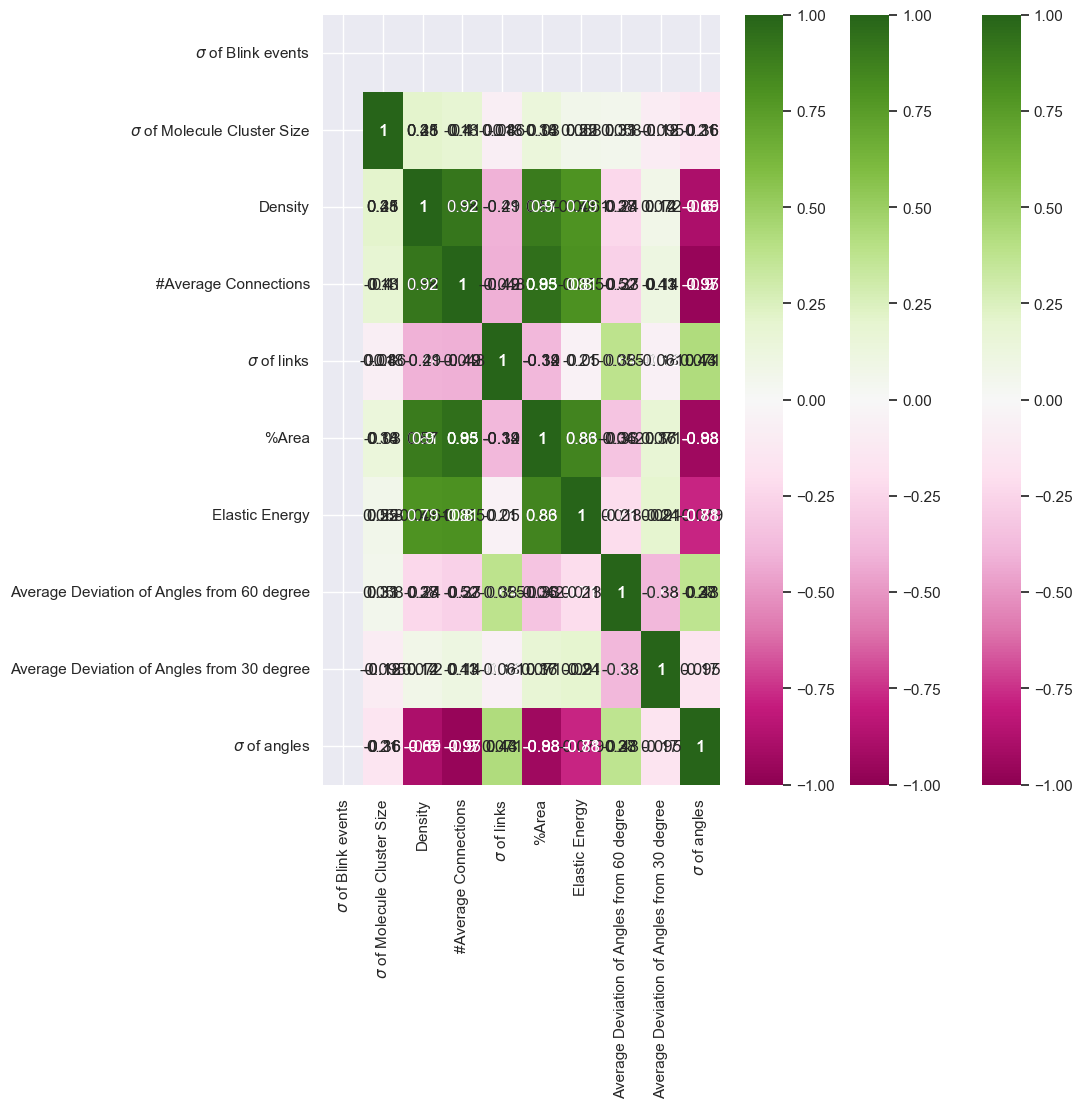

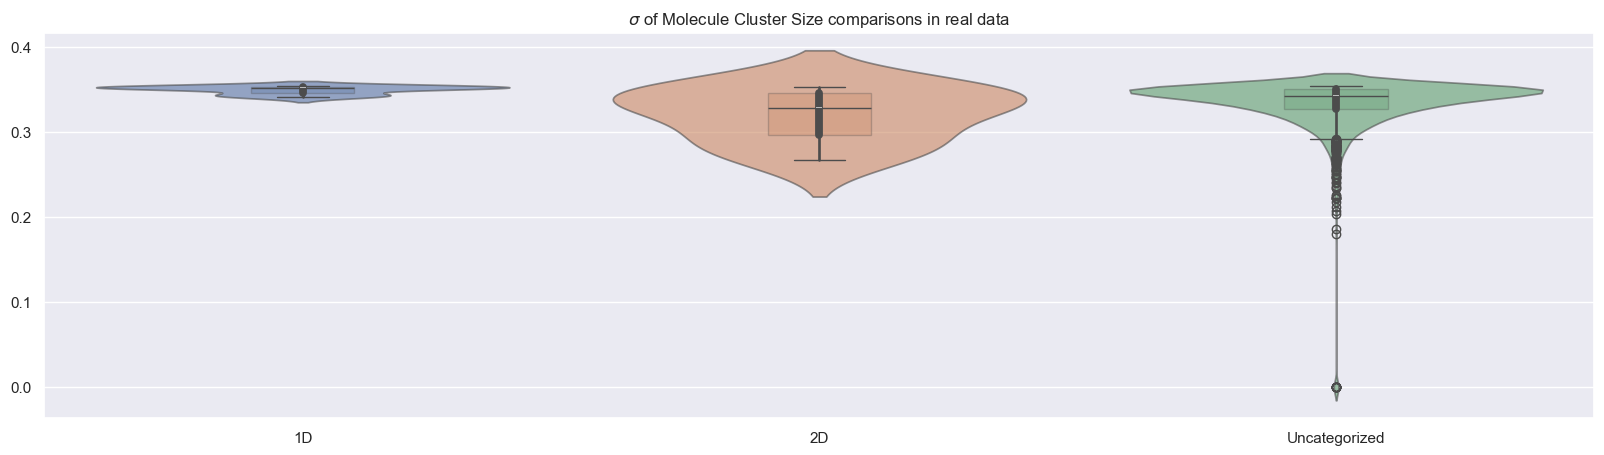

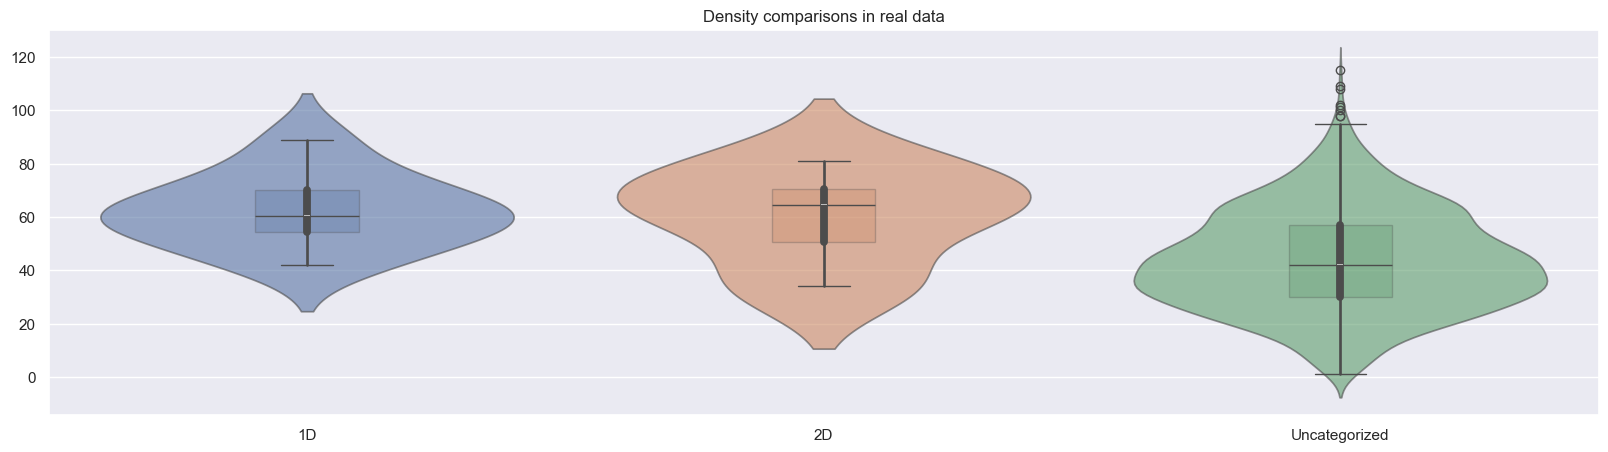

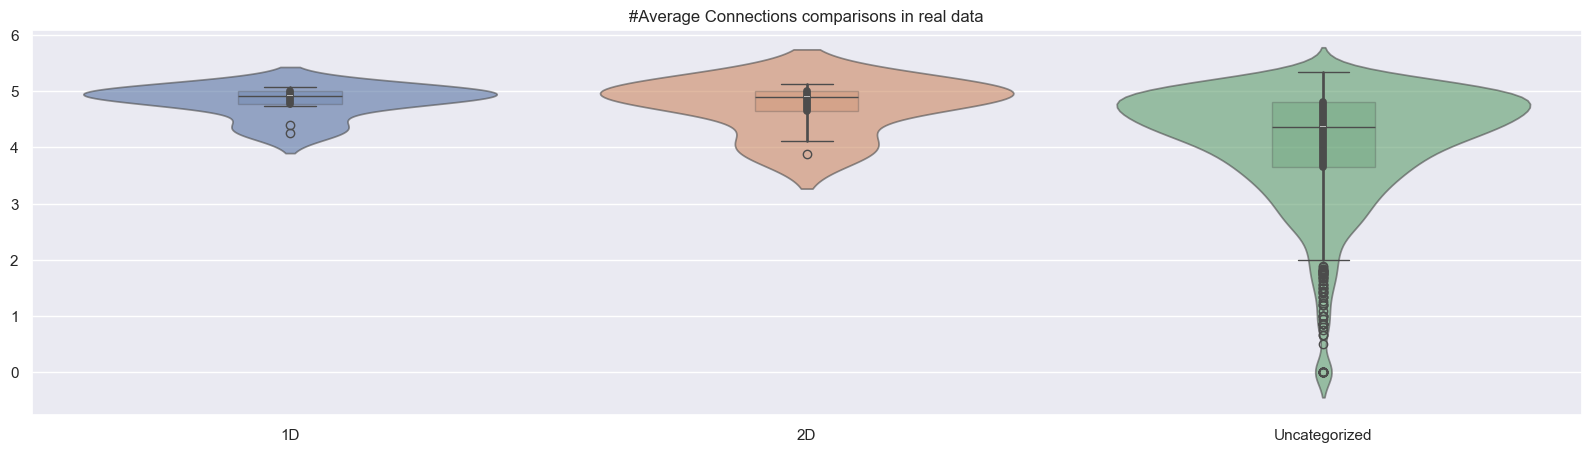

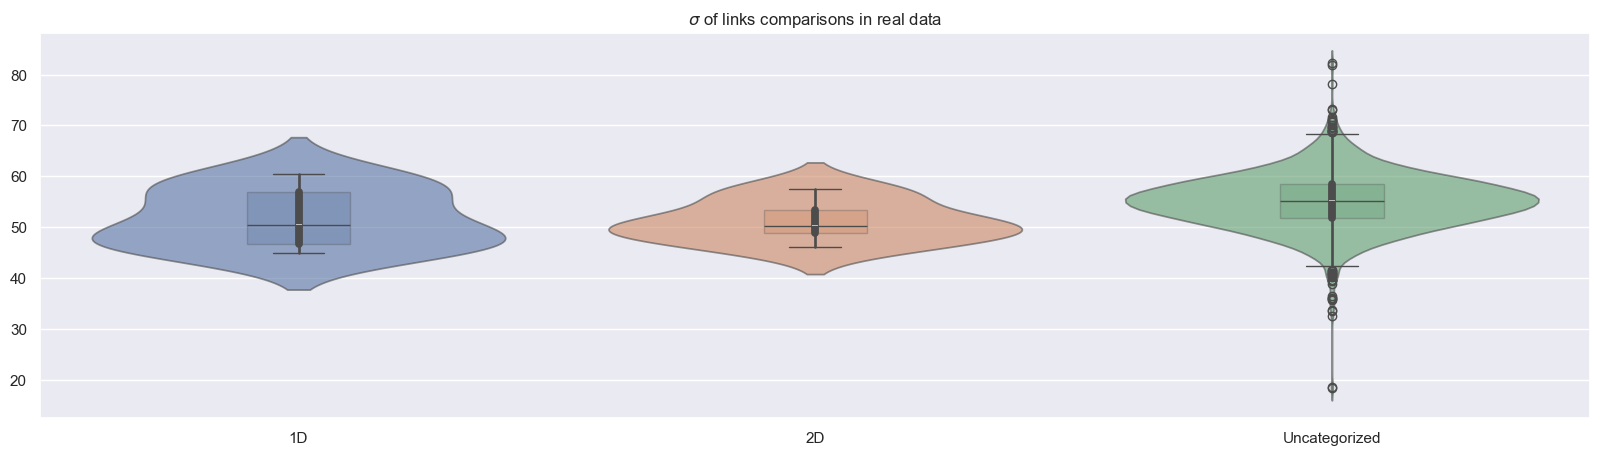

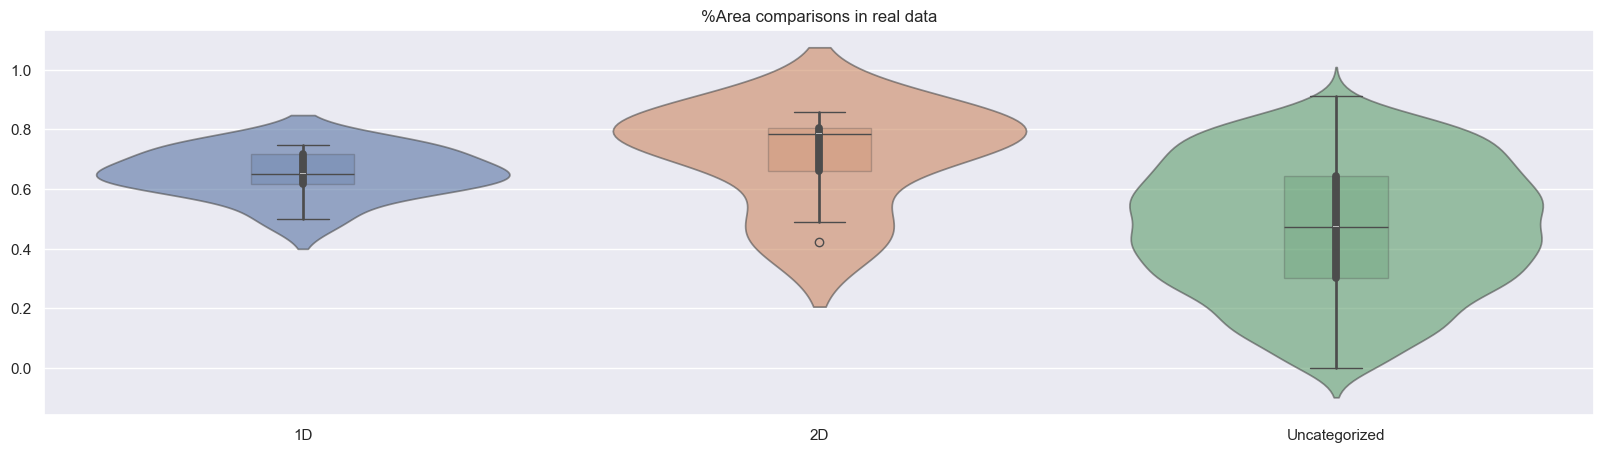

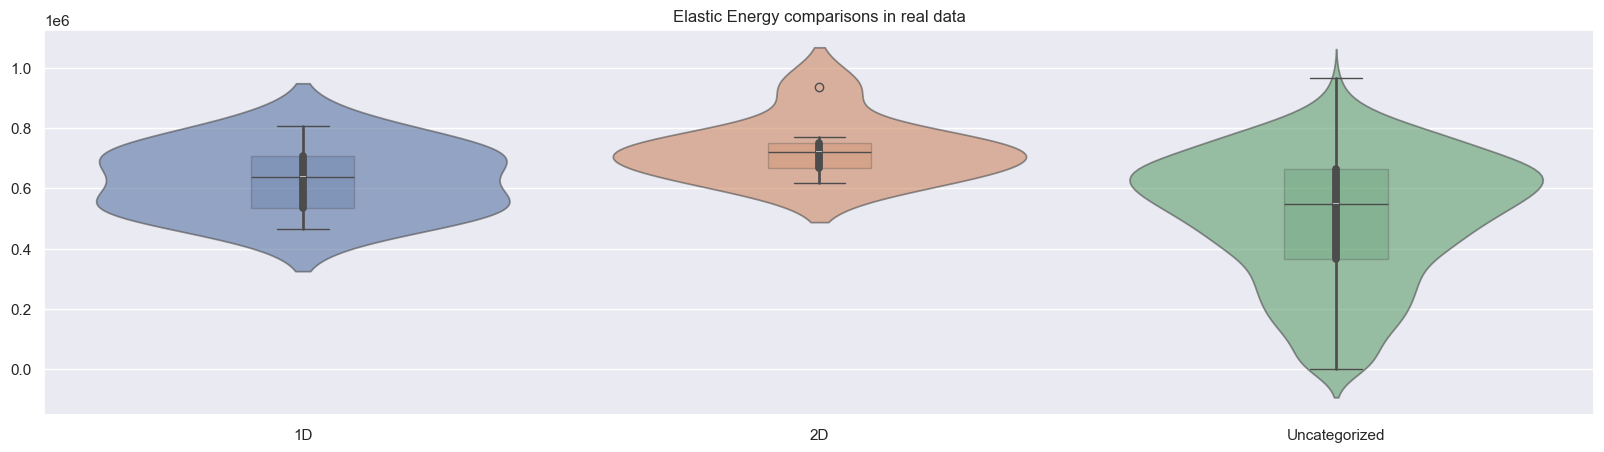

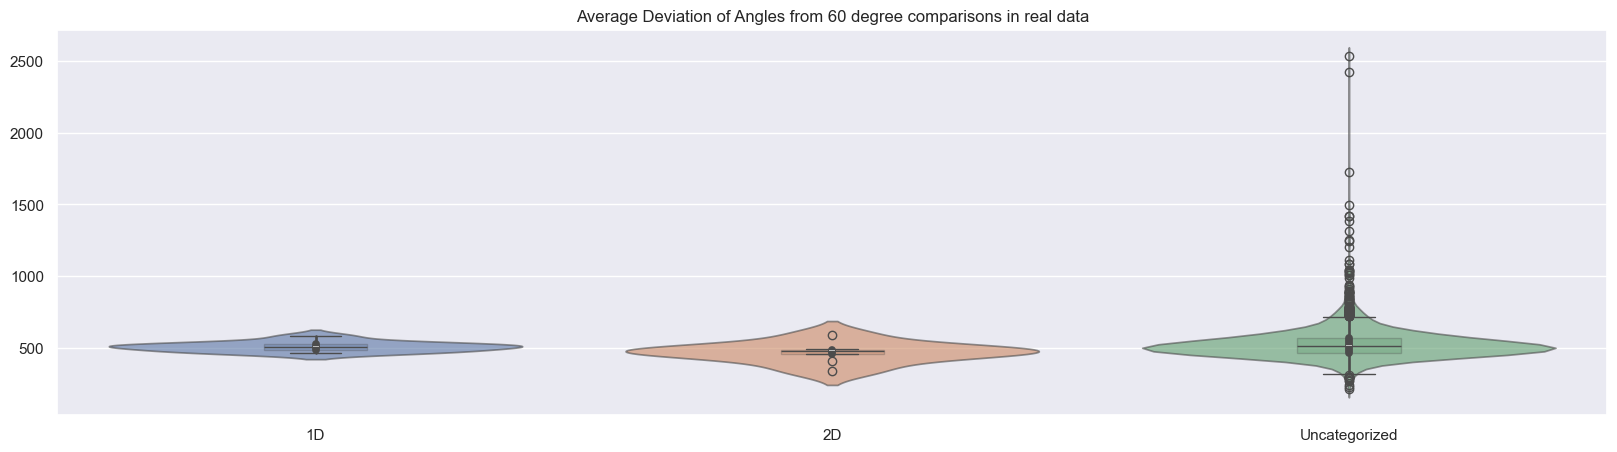

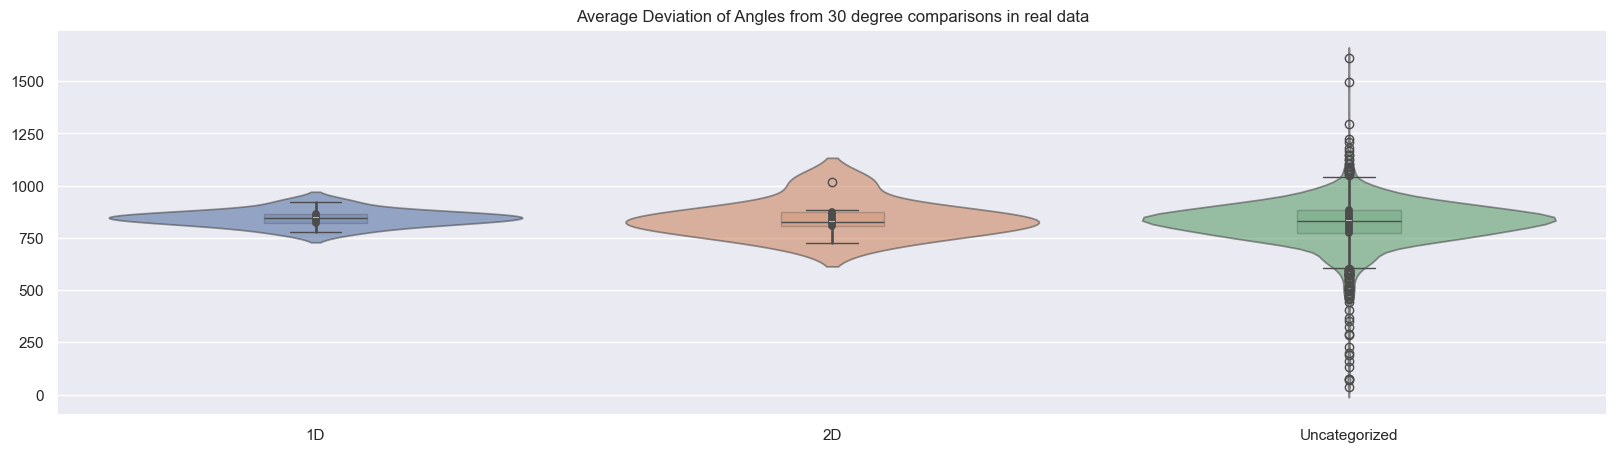

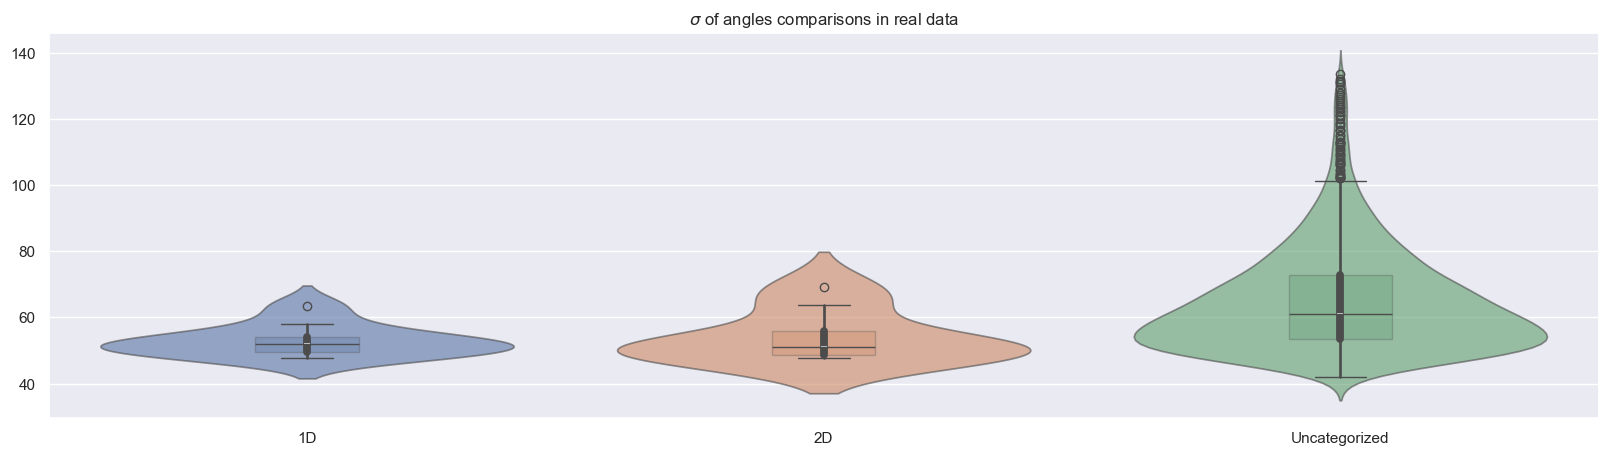

In [20]:
from skimage.feature import blob_dog, blob_log, blob_doh
#from sklearn.decomposition import PCA
thre=[50,280]
for t_r in [0.1,0.15,0.2]:
    plt.figure()
    test_1d = glob.glob("../data/rendered/soma/1D/*.npy")
    stats_1d = statsForNpys(test_1d, thre=thre, title="1D",min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r)
    test_2d = glob.glob("../data/rendered/soma/2D/*.npy")
    stats_2d = statsForNpys(test_2d, thre=thre, title="2D",min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r)
    test_un = glob.glob("../data/rendered/soma/Rand/*.npy")
    stats_un = statsForNpys(test_un, thre=thre, title="Uncategorized",min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r)


    # pca = PCA(n_components=2)
    # pca_un = pca.fit_transform(np.nan_to_num(stats_un[:,1:]))
    # principalDf = pd.DataFrame(data = pca_un
    #             , columns = ['PCA1', 'PCA2'])

    # fig = plt.figure(figsize = (8,8))
    # ax = fig.add_subplot(1,1,1) 
    # ax.set_xlabel('Principal Component 1', fontsize = 15)
    # ax.set_ylabel('Principal Component 2', fontsize = 15)
    # ax.set_title('2 component PCA', fontsize = 20)
    #ax.scatter(pca_un[:,0], pca_un[:,1],s=4, alpha=0.5)
    # si=0
    # ss=[2,20,20]
    # for data in [stats_un,stats_1d, stats_2d]:
    #     pca_data = pca.transform(np.nan_to_num(data[:,1:]))
    #     ax.scatter(pca_data[:,0], pca_data[:,1],s=ss[si])
    #     si+=1
    
    # plt.legend(["Uncategorized","1D","2D"],markerscale=3, scatterpoints=1)
    #"Simulated_Noise0","Simulated_All0",

    labels=[r'$\sigma$ of Molecule Cluster Size', "Density", "#Average Connections", r'$\sigma$ of links', "%Area","Elastic Energy", "Average Deviation of Angles from 60 degree", "Average Deviation of Angles from 30 degree",r'$\sigma$ of angles']

    for i in range(9):
        plt.figure(figsize=[20,5])
        df = pd.Series(np.array(stats_1d)[:,i+1], name="1D").to_frame().join(pd.Series(np.array(stats_2d)[:,i+1], name="2D"), how="outer")
        df = df.join(pd.Series(np.array(stats_un)[:,i+1], name="Uncategorized"), how="outer")
        sns.boxplot(data=df, width = 0.2, boxprops=dict(alpha=.3)) 
        sns.violinplot(data=df, alpha=0.6)
        plt.title(labels[i]+" comparisons in real data")

    # si=0
    # for i in [n_un,200,200,200,200,200,n_un]:
    #     ax.scatter(principalDf['PCA1'][si:si+i], principalDf['PCA2'][si:si+i] , s = 2)
    #     si +=i



In [145]:
for i in range(10):
    print(len(stats_1d[0][i]))

TypeError: object of type 'int' has no len()

In [141]:
stats_1d

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
         1.41421356, 1.41421356, 1.41421356, 0.70710678, 1.41421356,
         0.70710678, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
         1.41421356, 1.41421356, 0.70710678, 0.70710678, 1.41421356,
         1.41421356, 1.41421356, 1.41421356, 1.41421356, 0.70710678,
         1.41421356, 1.41421356, 0.70710678, 1.41421356, 0.70710678,
         1.41421356, 1.41421356, 1.41421356, 0.70710678, 0.70710678,
         1.41421356, 0.70710678, 0.70710678, 1.41421356, 